**Autor** : Diana Angel

**e-mail**: dianam071@gmail.com

#  <a name="resumo"> Goal </a>

A bank aims to develop a model to identify a higher probability of default. Your task will be to carry out a descriptive analysis and data processing to understand the profile of customers and which factors can influence credit risk

# Descriptive analysis of the bank data base

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt
import missingno as msno
import warnings
#warnings.filterwarnigs("ignore")

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("risco_credito.csv")
data.head(10)

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0
5,False,0.22,8007.11,36.0,NaN,43008.57,NaN,f,False,0.0
6,False,0.42,10072.16,36.0,0.0,39335.52,virg,m,False,0.0
7,False,0.42,16016.97,60.0,102018.0,98772.00,NaN,m,True,0.0
8,False,0.36,11517.24,60.0,0.0,62014.40,NaN,f,False,0.0
9,False,0.24,11539.08,36.0,82310.0,85022.96,NaN,f,True,0.0


Basic database information

In [4]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  
show_info(data)

DATASET SHAPE:  (64592, 10) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB
None

 -----------------------------------------------

Graphical representation of the missing values

<AxesSubplot:>

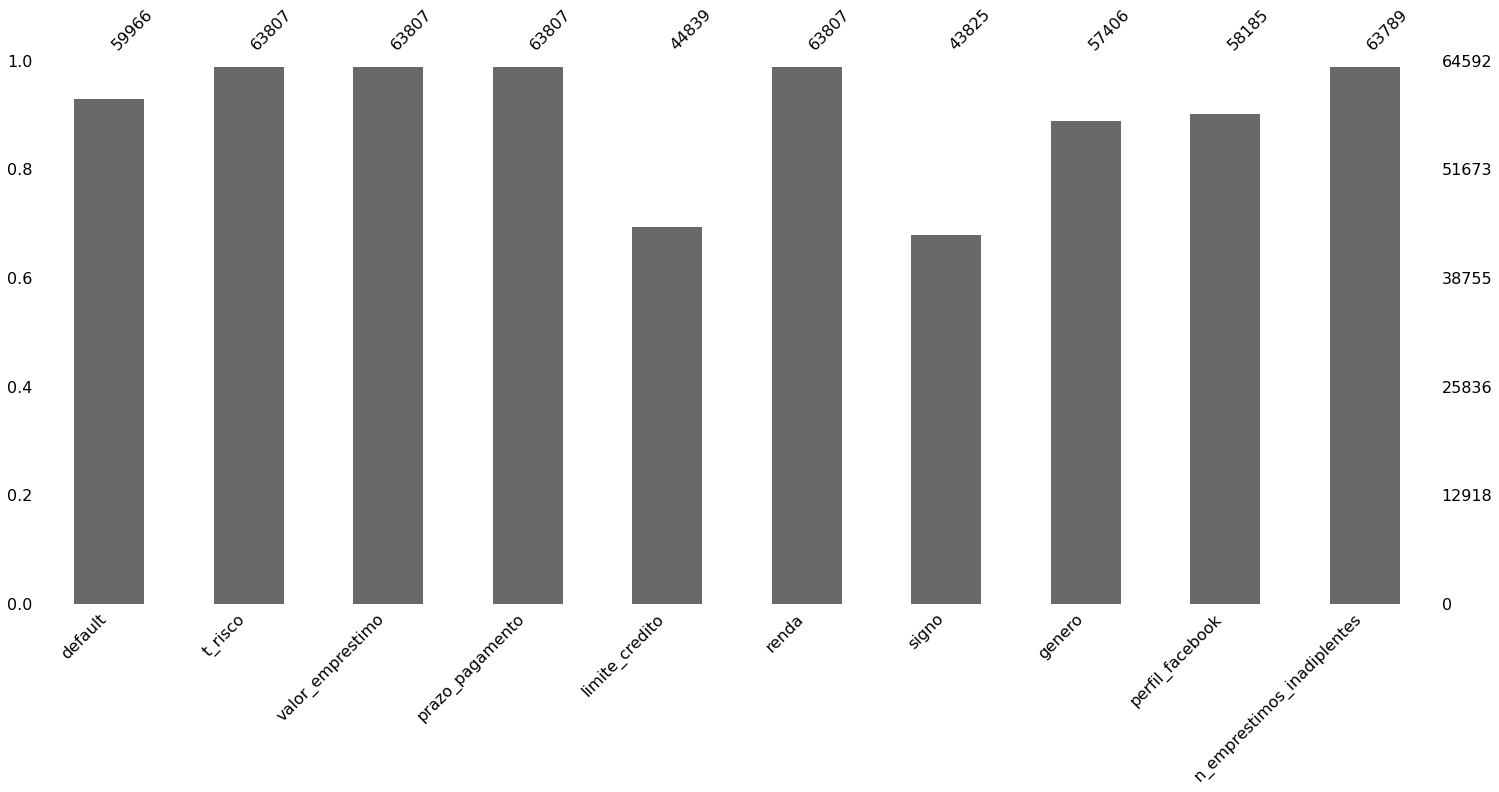

In [5]:
msno.bar(data)

1. The row with missing values for the variable default will be deleted

In [6]:
data = data.dropna(subset=["default"])

In [7]:
data.columns

Index(['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento',
       'limite_credito', 'renda', 'signo', 'genero', 'perfil_facebook',
       'n_emprestimos_inadiplentes'],
      dtype='object')

In [8]:
data_columnas_numericas= data.drop(['default', 'genero', 'signo', 'perfil_facebook', 'prazo_pagamento'], axis=1)


## Main statistical measurements

In [9]:
data_columnas_numericas.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
t_risco,59966.0,0.29,0.10,0.00,0.22,0.29,0.36,0.90
valor_emprestimo,59966.0,13411.81,7957.40,527.07,7225.99,12012.40,18036.64,35059.60
limite_credito,41187.0,34093.01,36783.48,0.00,9907.00,25338.00,46759.50,613117.00
renda,59966.0,71325.78,51691.43,4821.18,44027.86,60047.26,85039.61,5000027.83
n_emprestimos_inadiplentes,59948.0,0.00,0.08,0.00,0.00,0.00,0.00,5.00


2. The Na value of columns n_emprestimos_inadiplentes and limite_credito were filled with the median because the distribution is not uniform 

In [10]:
fit_credito= {"limite_credito":data['limite_credito'].median(), "n_emprestimos_inadiplentes":data['n_emprestimos_inadiplentes'].median()}
data= data.fillna(value=fit_credito)

# Helper function
* Implement a helper function to calculate the r-square score 
* It should take independent features X and dependent feature y 
* Then split that into training and testing sets 
* Fit the training set 
* Predict the test set 
* Return the r-square score

In [11]:
def regression_score(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred = lin.predict(X_test)
    return r2_score(y_pred, y_test)

## Statistical measurement, which fill better NA values

In [12]:
data_drop = data_columnas_numericas.dropna()
regression_score(data_drop.drop('t_risco', axis=1), data_drop[['t_risco']])
regression_score(data_drop.drop('limite_credito', axis=1), data_drop[['limite_credito']])

-9.579726370052065

In [13]:
data_mean = data_columnas_numericas.fillna(data_columnas_numericas.mean())
regression_score(data_mean.drop('t_risco', axis=1), data_mean[['t_risco']])
#regression_score(data_mean.drop('prazo_pagamento', axis=1), data_mean[['prazo_pagamento']])
regression_score(data_mean.drop('limite_credito', axis=1), data_mean[['limite_credito']])

-13.30995414788893

In [14]:
data_mode = data_columnas_numericas.fillna(data_columnas_numericas.mode().iloc[0])
regression_score(data_mode.drop('t_risco', axis=1), data_mode[['t_risco']])
#regression_score(data_mode.drop('prazo_pagamento', axis=1), data_mode[['prazo_pagamento']])
regression_score(data_mode.drop('limite_credito', axis=1), data_mode[['limite_credito']])

-12.298545134726387

In [15]:
data_median = data_columnas_numericas.fillna(data_columnas_numericas.median())
regression_score(data_median.drop('t_risco', axis=1), data_median[['t_risco']])
#regression_score(data_median.drop('prazo_pagamento', axis=1), data_median[['prazo_pagamento']])
regression_score(data_median.drop('limite_credito', axis=1), data_median[['limite_credito']])

-12.487640846617625

## Variability index

In [16]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) 
V_risco = cv(data['t_risco'])
V_emprestimo = cv(data['valor_emprestimo'])
V_credito = cv(data['limite_credito'])
V_renda = cv(data['renda'])

print('V_risco: \n',round(V_risco,2))
print('V_emprestimo: \n',round(V_emprestimo,2))
print('V_credito: \n',round(V_credito,2))
print('V_renda: \n',round(V_renda,2))

V_risco: 
 0.34
V_emprestimo: 
 0.59
V_credito: 
 0.98
V_renda: 
 0.72


3. Replace the missed values of the qualitatives variables with the mode  

In [17]:
data['default'].value_counts()

False    50456
True      9510
Name: default, dtype: int64

In [18]:
total_d= data['default'].size
(50456*100)/total_d

84.14101324083647

In [19]:
data['genero'].value_counts()

m    38497
f    18473
Name: genero, dtype: int64

In [20]:
total_g= data['genero'].size
Males= (38497*100)/total_g

In [21]:
data['perfil_facebook'].value_counts()

False    33997
True     19998
Name: perfil_facebook, dtype: int64

In [22]:
total_f= data['perfil_facebook'].size
(33997*100)/total_f

56.69379314945136

In [23]:
data['signo'].value_counts()

libr     5582
virg     5571
cance    5541
leo      3507
gemi     3499
scor     3091
arie     3045
pisce    2992
capr     2958
aqua     2839
sagi     1402
taur     1001
Name: signo, dtype: int64

In [24]:
data['perfil_facebook'] = data['perfil_facebook'].fillna(data['perfil_facebook'].mode()[0])
data['genero'] = data['genero'].fillna(data['genero'].mode()[0])

In [25]:
data.isnull().sum()

default                           0
t_risco                           0
valor_emprestimo                  0
prazo_pagamento                   0
limite_credito                    0
renda                             0
signo                         18938
genero                            0
perfil_facebook                   0
n_emprestimos_inadiplentes        0
dtype: int64

## Custumer Profile

64 % of the custumers are males
56 % have not profile on facebook
libra, cancer and virgo are the predominant zodiac signs
valor_emprestimo, limite_credito, renda are the most variable parameters
84% of customers are likely to default
The average risk (t_risco) rate is 30%
25% of the customer has a risk rate between 0.36 to 0.9
75% had an income (renda) of up to $8500

In [26]:
df = data.drop(['default', 'genero', 'signo', 'perfil_facebook', 'prazo_pagamento'], axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
t_risco,59966.0,0.294114,0.101183,0.00,0.2200,0.29,0.3600,0.90
valor_emprestimo,59966.0,13411.805468,7957.402823,527.07,7225.9875,12012.40,18036.6450,35059.60
limite_credito,59966.0,31351.281393,30753.702302,0.00,17316.5000,25338.00,35125.0000,613117.00
renda,59966.0,71325.776783,51691.429992,4821.18,44027.8575,60047.26,85039.6125,5000027.83
n_emprestimos_inadiplentes,59966.0,0.004669,0.079048,0.00,0.0000,0.00,0.0000,5.00


## Customer Default risk

C:\Users\17706\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Default')

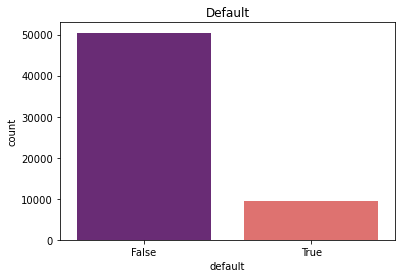

In [27]:
sns.countplot(data['default'], palette='magma').set_title('Default')

C:\Users\17706\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 't_risco')

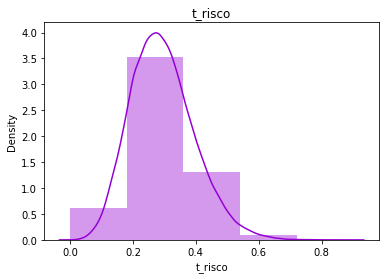

In [28]:
sns.distplot(df['t_risco'], bins=5, rug=False, color='darkviolet').set_title('t_risco')

C:\Users\17706\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'limite_credito')

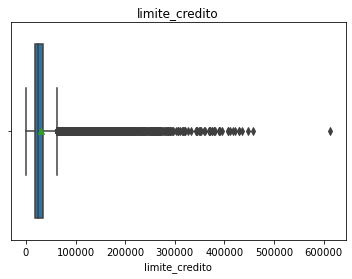

In [29]:
sns.boxplot(df['limite_credito'], showmeans=True).set_title('limite_credito')

## Bivariate analysis

Default is affected by t_risco? 

C:\Users\17706\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='t_risco', ylabel='count'>

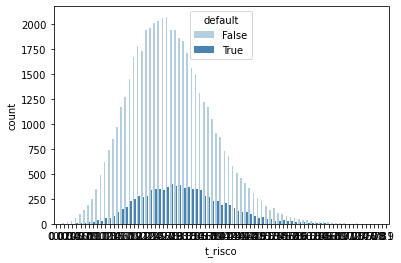

In [30]:
sns.countplot(data['t_risco'], hue=data.default, palette='Blues')

Men are likely to default?

C:\Users\17706\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genero', ylabel='count'>

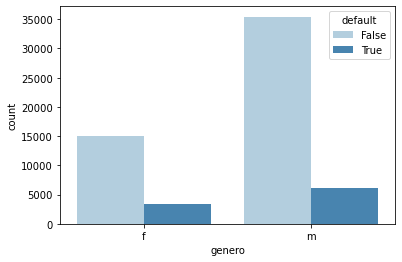

In [31]:
sns.countplot(data['genero'], hue=data.default, palette='Blues')

will people who have facebook likely default?

C:\Users\17706\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='perfil_facebook', ylabel='count'>

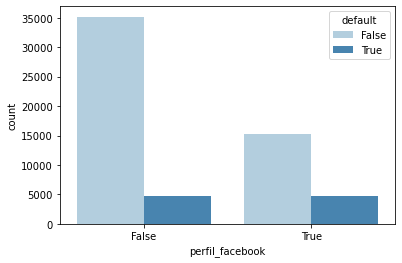

In [32]:
sns.countplot(data['perfil_facebook'], hue=data.default, palette='Blues')

We concluded that the variables genero and facebook profile seems dont afect the parameter default

<AxesSubplot:xlabel='default', ylabel='t_risco'>

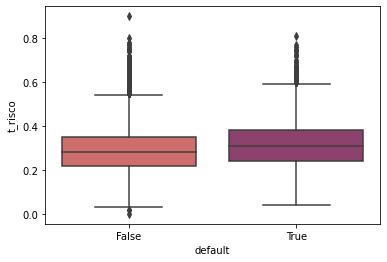

In [33]:
sns.boxplot(data=data, x="default", y="t_risco",palette='flare')

(0.0, 100000.0)

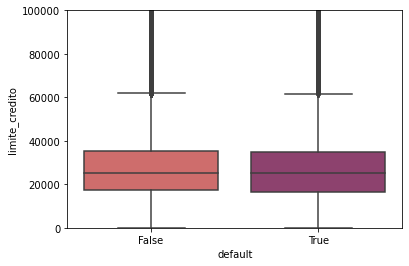

In [34]:
sns.boxplot(data=data, x="default", y="limite_credito",palette='flare')
plt.ylim(0, 100000)

(0.0, 200000.0)

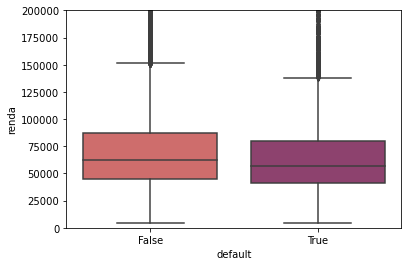

In [35]:
sns.boxplot(data=data, x="default", y="renda",palette='flare')
plt.ylim(0, 200000)

<AxesSubplot:xlabel='default', ylabel='valor_emprestimo'>

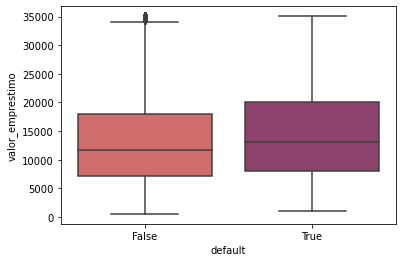

In [36]:
sns.boxplot(data=data, x="default", y="valor_emprestimo",palette='flare')

<AxesSubplot:title={'center':'Correlation between the variables'}>

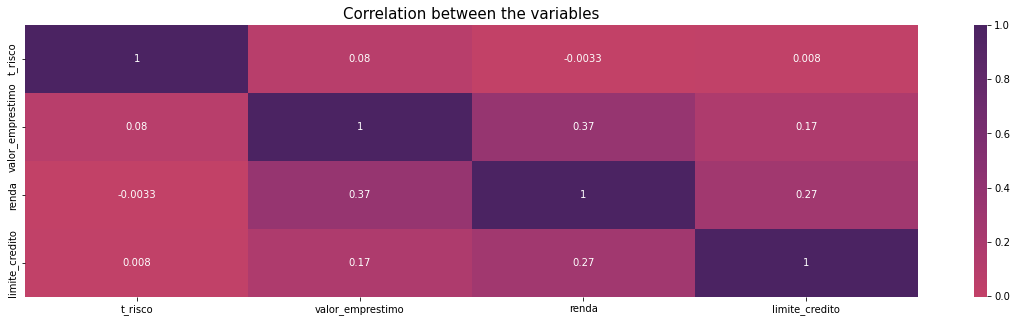

In [37]:
va_correlacao = data[['t_risco','valor_emprestimo','renda','limite_credito','default']]
#va_correlacao.corr()
plt.figure(figsize=(20,5))
plt.title('Correlation between the variables', size=15)
sns.heatmap(va_correlacao.corr(), cmap='flare', center=0, annot=True)

<Figure size 1080x504 with 0 Axes>

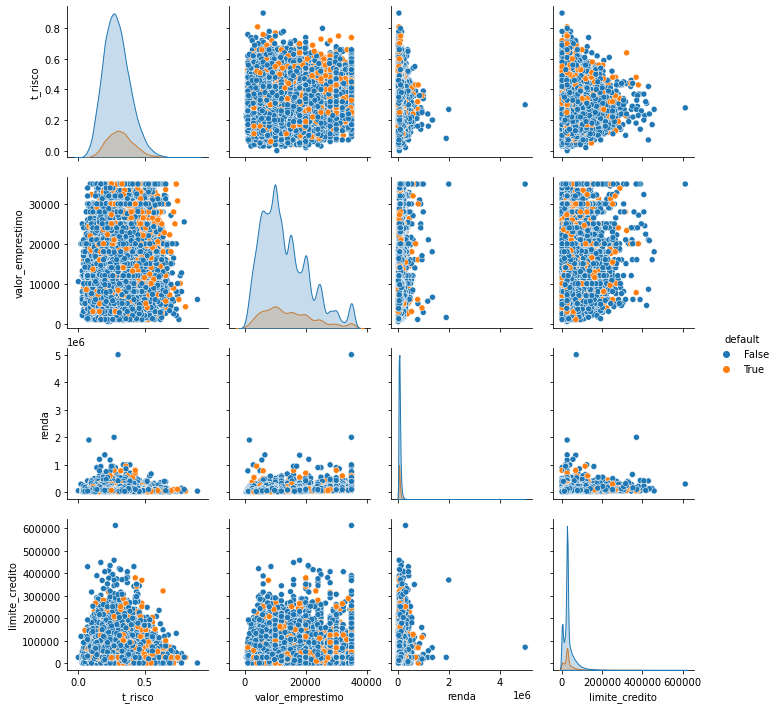

In [38]:
plt.figure(figsize=(15,7))
sns.pairplot(data=va_correlacao, hue='default')

In [42]:
variable_quantitative= ['float64']
quantitatives=list(data.select_dtypes(include=variable_quantitative).columns)

In [40]:
#df_qua = 
data[quantitatives]

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
0,0.43,20024.31,60.0,62386.0,59869.05,0.0
1,0.23,10046.51,36.0,25338.0,46016.31,0.0
2,0.30,21228.25,60.0,25338.0,48025.47,0.0
3,0.15,23032.33,36.0,25338.0,46011.12,0.0
4,0.08,24026.29,36.0,32366.0,90026.17,0.0
...,...,...,...,...,...,...
64587,0.33,7230.74,36.0,25338.0,57012.14,0.0
64588,0.20,9764.01,36.0,15478.0,76032.77,0.0
64589,0.53,35022.28,60.0,18658.0,100028.45,0.0
64590,0.43,20015.96,36.0,25338.0,109561.85,0.0


In [41]:
for variable_quantitative in data[quantitatives]:
    print(variable_quantitative)
    df_qua[variable_quantitative].hist(bins=10)
    plt.show()


t_risco


NameError: name 'df_qua' is not defined

Transform qualitative variables into binary variables

In [ ]:
#binary= 
pd.get_dummies(data, columns=['prazo_pagamento', 'perfil_facebook', 'genero', 'default'], drop_first=True)

Take off the outliers in the boxplot

In [ ]:
data['t_risco'].quantile(0.975)

In [ ]:
data['t_risco'].quantile(0.025)

In [ ]:
data.loc[data["t_risco"] < 0.12, 't_risco'] = out_min 
data.loc[data["t_risco"] > 0.51, 't_risco'] = out_max 

In [ ]:
sns.boxplot(data=data, x="default", y="t_risco",palette='flare')